# Read these instructions completely in order to receive full credit

- Before you submit the problem set, make sure everything runs as expected. Go to the menu bar at the top of Jupyter Notebook and click `Kernel > Restart & Run All`. Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

- You should not use `install.packages()` anywhere. You may assume that we have already installed all the packages needed to run your code.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions. The `stop()` functions produce an error and are there to remind you of cells that need an answer.

- If you are working in a group, make sure you and your collaborators have been [added to a group on Canvas](https://umich.instructure.com/courses/270337/discussion_topics/658777). You should also specify your group members when submitting to Gradescope.
- As a backup, *also* fill in your uniqid as well as those of your collaborators below:

Your uniqid: `<replace with your uniqid>`

Uniqids of your collaborator(s): `<replace with their uniqids>`

- This assignment should be submitted to both Canvas and Gradescope using the [instructions](https://piazza.com/class/jqh1wx3xw9amg?cid=55) posted on Piazza. **You must upload the problem set to __both__ Canvas and Gradescope in order to recieve full credit.** 
- **Carefully proofread the PDF that you upload to Canvas. PDFs that have missing or truncated code cannot be graded and will not receive credit.**

---

In [ ]:
library(tidyverse)

# STATS 306
## Problem Set 9: Functions & regression

#### Problem 1
Write a function `gcd(v)` which, given a vector of non-negative integers, returns their greatest common divisor. For example:
```{r}
> gcd(c(2,4,6,8))
[1] 2
> gcd(c(4,8,12))
[1] 4
> gcd(c(4,8,13))
[1] 1
```

In [ ]:
gcd <- function(v) {
    # YOUR CODE HERE
    stop()
}

In [ ]:
stopifnot(gcd(1) == 1)

#### Problem 2
We define the *special digit* of a non-negative integer $x$ as follows:
* If $x$ has only one digit, then its special digit is $x$ itself.
* Otherwise, the special digit of $x$ is equal to the special digit of the [digit sum](https://en.wikipedia.org/wiki/Digit_sum) (the sum of all of the digits) of $x$.

For example,
```
special_digit(199) = special_digit(1 + 9 + 9)
                   = special_digit(19)
                   = special_digit(1 + 9)
                   = special_digit(10)
                   = special_digit(1 + 0)
                   = special_digit(1)
                   = 1.
```
Implement the function `special_digit(x)`.

In [ ]:
special_digit <- function(x) {
    # YOUR CODE HERE
    stop()
}

In [ ]:
stopifnot(special_digit(199) == 1)
stopifnot(special_digit(0) == 0)
stopifnot(special_digit(60) == 6)

#### Problem 3
Alice and Bob have decided to implement a secret code. Given a particular string, the code works by replacing all repeated characters in the string with a single copy of that character, followed by the number of times it is repeated. (Admittedly, it's not a very great code.) For example:
```
> encode("hello bob")
[1] "hel2o bob"
> encode("do you prefer programming or quidditch?")
[1] "do you prefer program2ing or quid2itch?"
> decode("this mes2age has be2n encoded")
[1] "this message has been encoded"
> decode("hel3o10 nurse!")
[1] "hellloooooooooo nurse!"
```
Implement the functions `encode()` and `decode()`.

In [ ]:
encode <- function(s) {
    # YOUR CODE HERE
    stop()
}
decode <- function(s) {
    # YOUR CODE HERE
    stop()
}

In [ ]:
stopifnot(exists("encode"))
stopifnot(exists("decode"))

#### Problem 4
If we regress `y` on `x`, then the regression coefficient gives the average rate of change of `y` with respect to `x`. For example:

In [ ]:
lm(cty ~ hwy, mpg) %>% coef

This says that if highway mileage increases by one mile per gallon, average city mileage increases by about 0.68 miles per gallon:

In [ ]:
dcity = mpg %>% filter(hwy %in% 24:25) %>% 
                group_by(hwy) %>% summarize(mean(cty)) %>% print
diff(dcity[[2]])

Earlier in the semester we saw that the `log(price)` of a diamond has approximately a linear relationship with `log(carat)`:

In [ ]:
lm(log(price) ~ log(carat), diamonds) %>% coef

What does this regression say about the relationship between __price__ (not `log(price)`) and __carat__ (not `log(carat)`)?

YOUR ANSWER HERE

#### Problem 5
In lecture we said that regressing `log(price)` on `log(carat)` "removed" the effect of size on a diamond's price, enabling us to visualize net effect of cut, color, and clarity on price by looking at the residuals of that regression.

If the residuals are not affected by `log(carat)`, then intuitively they should be uncorrelated with `log(carat)`. Verify that this is true by computing the correlation between the residuals and the size predictor in this regression. Due to numerical error it will be very small but not exactly zero.

In [ ]:
# YOUR CODE HERE
stop()

Explain why this implies that the predicted values are also uncorrelated with the residuals in a linear regression.

YOUR ANSWER HERE

## NCAA data
The files in `ncaa/` ([source](https://github.com/brendanlong/ncaa-predict)) represent 18 years of NCAA basketball data:

In [ ]:
dir("ncaa/")

#### Problem 6
There are 18 tables containing data about NCAA games, and one table containing information about schools. Merge the games files into a single tibble called `games`, and load schools table into a variable of the same name:table.
```
> games
# A tibble: 542,797 x 11
   opponent_name game_date  score opponent_score location neutral_site_lo…
   <chr>         <date>     <dbl>          <dbl> <chr>    <chr>           
 1 Sul Ross St.  2001-11-16    93             59 Home     <NA>            
 2 Texas St.     2001-11-25    89             99 Home     <NA>            
 3 Loyola Chica… 2001-11-29    66             86 Away     <NA>            
 4 Illinois      2001-12-01    56             80 Away     <NA>            
 5 Texas         2001-12-05    64             89 Away     <NA>            
 6 UTEP          2001-12-08    56             82 Away     <NA>            
 7 Lamar         2001-12-15    67             69 Home     <NA>            
 8 San Francisco 2001-12-18    80             75 Home     <NA>            
 9 Denver        2001-12-21    81             79 Home     <NA>            
10 Wayland Bapt… 2001-12-28    92             83 Home     <NA>            
# ... with 542,787 more rows, and 5 more variables: game_length <chr>,
#   attendence <dbl>, opponent_id <dbl>, year <dbl>, school_id <dbl>

> schools
# A tibble: 1,335 x 2
   school_id school_name       
       <dbl> <chr>             
 1     26172 A&M-Corpus Christi
 2         2 Abilene Christian 
 3     30123 Academy of Art    
 4       929 Adams St.         
 5    506445 Adelbert          
 6         3 Adelphi           
 7         4 Adrian            
 8     11324 Agnes Scott       
 9       721 Air Force         
10         5 Akron             
# ... with 1,325 more rows
```

In [ ]:
# YOUR CODE HERE
stop()

In [ ]:
stopifnot(exists("games"))
stopifnot(exists("schools"))

#### Problem 7
Reproduce the following plot showing the games that Michigan has played each season:
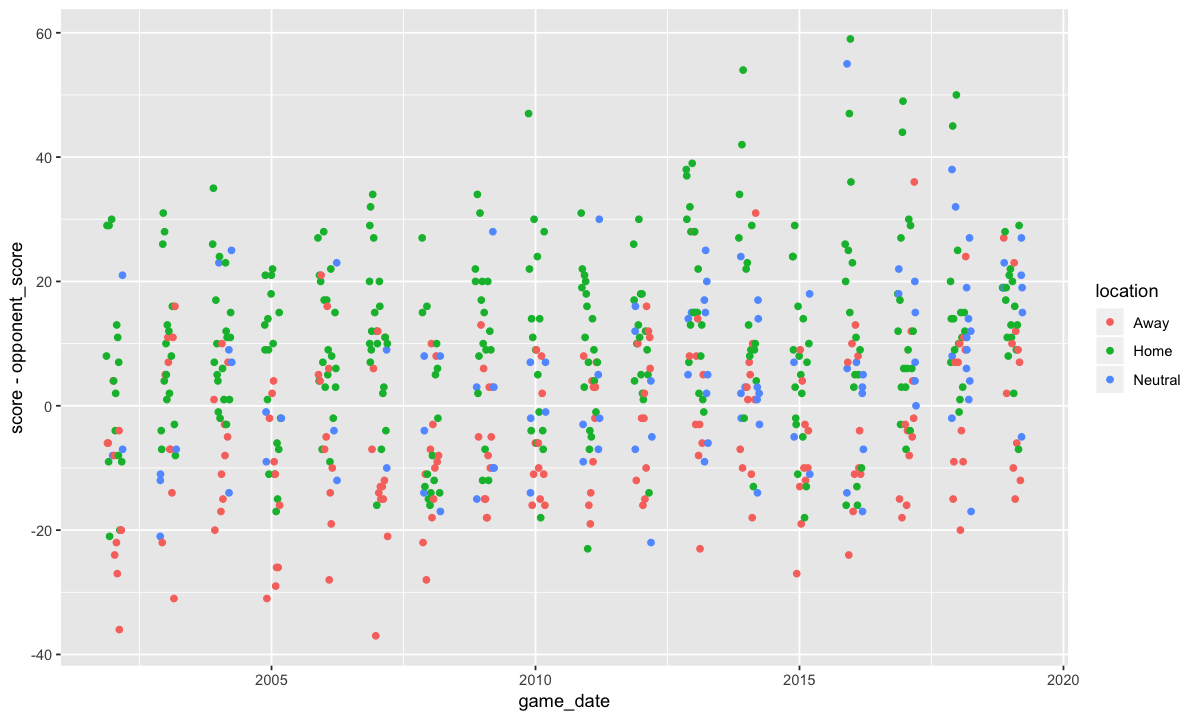
Does the plot give you any intuition about whether Michigan plays better at home or away?

#### Problem 8
Use linear regression to analyze how Michigan's yearly winning percentage has changed over time. Summarize your findings appropriately.

YOUR ANSWER HERE

#### Problem 9
Use linear regression to study the effect of playing at home, away, or at a neutral location. Summarize your findings appropriately.

YOUR ANSWER HERE

#### Problem 10
Not all home games are equal. Sometimes, there is a large crowd to cheer the home team on. Use linear regression to investigate the effect of `attendance` on the performance of the home team. Summarize your findings appropriately.

YOUR ANSWER HERE